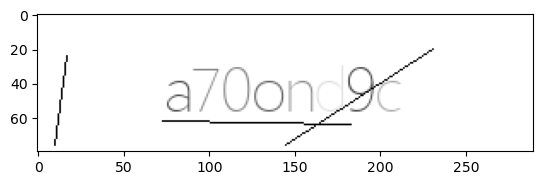

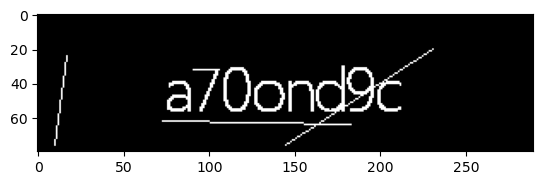

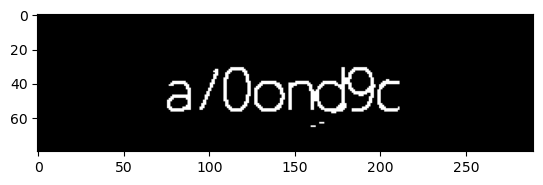

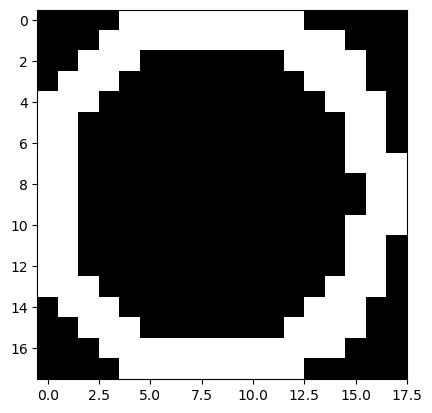

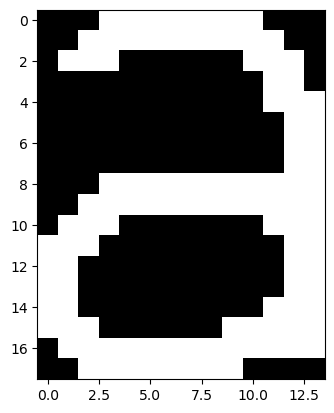

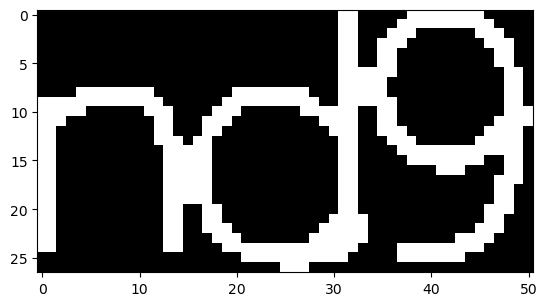

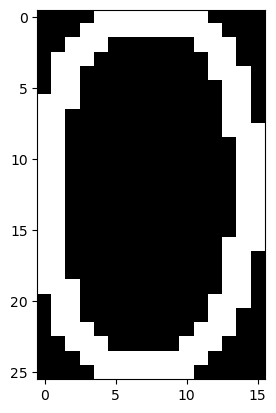

Segmentation completed!


In [31]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
    

# Create output folder for segmented characters
output_folder = "extracted_letter_images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Load the CAPTCHA image
image_path = "train/a70ond9c-0.png"  
image = cv2.imread(image_path)
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()

img = cv2.equalizeHist(img)

im_bw_inverted = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

plt.imshow(im_bw_inverted, cmap='gray')
plt.show()


im_bw_inverted = cv2.medianBlur(im_bw_inverted, 3)
plt.imshow(im_bw_inverted, cmap='gray')
plt.show()

# Adjust kernel size for closing operation
kernel = np.ones((1, 1), np.uint8)  # Larger kernel for closing
closed = cv2.morphologyEx(im_bw_inverted, cv2.MORPH_CLOSE, kernel)

# Find contours again after applying closing operation
cnts = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 50  # Lowered min area to capture smaller parts like dots
image_number = 0

for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        x, y, w, h = cv2.boundingRect(c)
        # Draw a rectangle around each detected character
        cv2.rectangle(image, (x, y), (x + w, y + h), (36, 255, 12), 2)
        # Extract each character as a Region of Interest (ROI)
        ROI = closed[y:y+h, x:x+w]
        plt.imshow(ROI, cmap='gray')
        plt.show()
        # Save the character as an individual image
        cv2.imwrite(os.path.join(output_folder, f"char_{image_number}.png"), ROI)
        image_number += 1

print("Segmentation completed!")


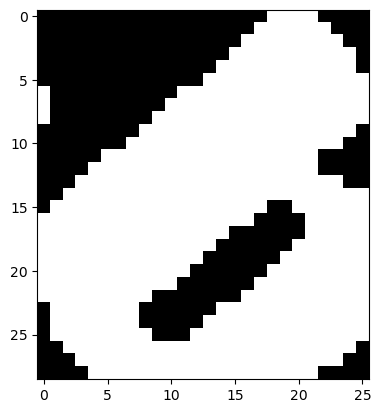

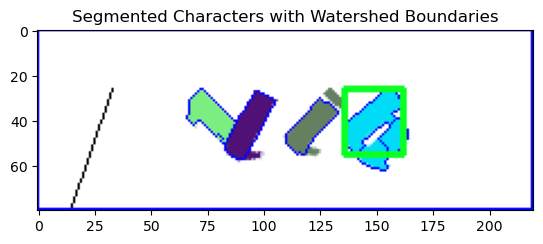

Segmentation completed!
